# Data Preprocessing Section



In [ ]:
# Imports
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


### Load in Data from CSV file

In [ ]:
df = pd.read_csv('Data.csv', encoding='ISO-8859-1', parse_dates=True)

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

# Section 1 | Data Cleaning

In [ ]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [ ]:
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jai

In [ ]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,hammers hand robson a youthful lesson,saints party like it s,wear wolves have turned into lambs,stump mike catches testy gough s taunt,langer escapes to hit,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [ ]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [ ]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [ ]:
df["Total News"] = pd.Series(headlines)

In [ ]:
new_df = df[['Date', 'Label', 'Total News']]
new_df.head()

,Date,Label,Total News
0,2000-01-03,0,a hindrance to operations extracts from the...
1,2000-01-04,0,scorecard the best lake scene leader german s...
2,2000-01-05,0,coventry caught on counter by flo united s riv...
3,2000-01-06,1,pilgrim knows how to progress thatcher facing ...
4,2000-01-07,1,hitches and horlocks beckham off but united su...


### NLP Processed Dataframe

In [ ]:
nlp_articles_df = pd.concat([new_df["Date"],new_df["Label"],new_df["Total News"]],axis="columns", join = "inner")
nlp_articles_df.set_index(pd.to_datetime(nlp_articles_df["Date"],infer_datetime_format=True),inplace=True)
nlp_articles_df.drop(columns=["Date"],inplace=True)
nlp_articles_df.head(10)

,Label,Total News
Date,,
2000-01-03,0,a hindrance to operations extracts from the...
2000-01-04,0,scorecard the best lake scene leader german s...
2000-01-05,0,coventry caught on counter by flo united s riv...
2000-01-06,1,pilgrim knows how to progress thatcher facing ...
2000-01-07,1,hitches and horlocks beckham off but united su...
2000-01-10,1,fifth round draw bbc unveils secret weapon in ...
2000-01-11,1,man utd south melbourne how north atlant...
2000-01-12,0,newcastle seek new football supremo liverpool ...
2000-01-13,1,bungling officials on the carpet and in the re...


# Section 2 | Machine Learning

In [ ]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

### Running Random Forest Model

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
model_rf = randomclassifier.fit(traindataset,train['Label'])

In [ ]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions_rf = randomclassifier.predict(test_dataset)

In [ ]:
test_dataset.shape

(378, 584289)

In [ ]:
report=classification_report(test['Label'],predictions_rf)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       186
           1       0.80      0.96      0.87       192

    accuracy                           0.86       378
   macro avg       0.87      0.86      0.85       378
weighted avg       0.87      0.86      0.86       378



### Running LSTM RNN 1

In [ ]:
X_lstm = nlp_articles_df["Total News"].values.astype(str)
y_lstm = nlp_articles_df["Label"].values

In [ ]:
X_lstm

array(['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title',
       'scorecard the best lake scene leader  german sleaze inquiry cheerio  b

In [ ]:
type(nlp_articles_df["Total News"][5])

str

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_lstm)

In [ ]:
X_seq = tokenizer.texts_to_sequences(X_lstm)

In [ ]:
X_pad = pad_sequences(X_seq, maxlen=140, padding="post")

In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_lstm, random_state=78)

In [ ]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
max_words = 140
embedding_size = 64

In [ ]:
# Define the LSTM RNN model
model_lstm = Sequential()
# Layer 1
model_lstm.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
# Layer 2
model_lstm.add(LSTM(units=280))
# Output layer
model_lstm.add(Dense(1, activation="sigmoid"))

In [ ]:
model_lstm.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy',"AUC"]
)

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           2945856   
_________________________________________________________________
lstm (LSTM)                  (None, 280)               386400    
_________________________________________________________________
dense (Dense)                (None, 1)                 281       
Total params: 3,332,537
Trainable params: 3,332,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
batch_size = 1000
lstm_history = model_lstm.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=50,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.3
)

Epoch 1/50
3/3 [==============================] - 11s 4s/step - loss: 0.6171 - accuracy: 0.7639 - auc: 0.9271 - val_loss: 0.7006 - val_accuracy: 0.4691 - val_auc: 0.5019
Epoch 2/50
3/3 [==============================] - 11s 4s/step - loss: 0.6267 - accuracy: 0.7342 - auc: 0.9122 - val_loss: 0.7002 - val_accuracy: 0.4800 - val_auc: 0.5063
Epoch 3/50
3/3 [==============================] - 11s 4s/step - loss: 0.6284 - accuracy: 0.7263 - auc: 0.9036 - val_loss: 0.7004 - val_accuracy: 0.4843 - val_auc: 0.5081
Epoch 4/50
3/3 [==============================] - 11s 4s/step - loss: 0.6261 - accuracy: 0.7342 - auc: 0.9023 - val_loss: 0.7007 - val_accuracy: 0.4843 - val_auc: 0.5063
Epoch 5/50
3/3 [==============================] - 11s 4s/step - loss: 0.6212 - accuracy: 0.7537 - auc: 0.9031 - val_loss: 0.7012 - val_accuracy: 0.4865 - val_auc: 0.5042
Epoch 6/50
3/3 [==============================] - 11s 4s/step - loss: 0.6140 - accuracy: 0.7723 - auc: 0.9057 - val_loss: 0.7017 - val_accuracy: 0.484

In [ ]:
predicted = model_lstm.predict_classes(X_test_lstm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
sentiments = pd.DataFrame({"Text": new_df["Total News"][:1026], "Actual": y_test_lstm[:1026], "Predicted": predicted.ravel()})
sentiments.head(40)

,Text,Actual,Predicted
0,a hindrance to operations extracts from the...,0,1
1,scorecard the best lake scene leader german s...,0,0
2,coventry caught on counter by flo united s riv...,0,0
3,pilgrim knows how to progress thatcher facing ...,1,1
4,hitches and horlocks beckham off but united su...,1,0
5,fifth round draw bbc unveils secret weapon in ...,1,1
6,man utd south melbourne how north atlant...,1,0
7,newcastle seek new football supremo liverpool ...,1,0
8,bungling officials on the carpet and in the re...,1,0
9,pompey plump for pulis work ethic roma under f...,1,0


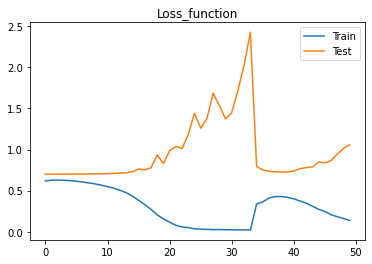

In [ ]:
plt.plot(lstm_history.history["loss"])
plt.plot(lstm_history.history["val_loss"])
plt.title("Loss_function")
plt.legend(["Train", "Test"])
plt.show()

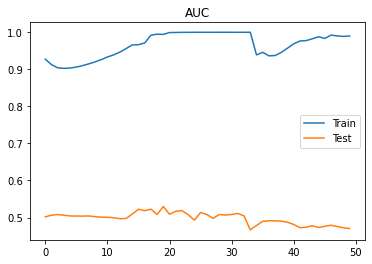

In [ ]:
plt.plot(lstm_history.history["auc"])
plt.plot(lstm_history.history["val_auc"])
plt.title("AUC")
plt.legend(["Train", "Test"])
plt.show()

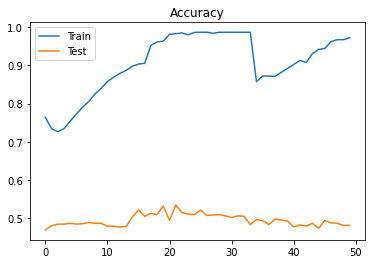

In [ ]:
plt.plot(lstm_history.history["accuracy"])
plt.plot(lstm_history.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
report=classification_report(sentiments['Actual'],predicted)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.49      0.48       497
           1       0.51      0.50      0.50       529

    accuracy                           0.49      1026
   macro avg       0.49      0.49      0.49      1026
weighted avg       0.49      0.49      0.49      1026



### Running LSTM RNN 2

In [ ]:
# Define the LSTM RNN model
model_lstm_2 = Sequential()
dropout_fraction = 0.2
# Layer 1
model_lstm_2.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_lstm_2.add(Dropout(dropout_fraction))
# Layer 2
model_lstm_2.add(LSTM(units=50))
model_lstm_2.add(Dropout(dropout_fraction))
# Output layer
model_lstm_2.add(Dense(1, activation="sigmoid"))

In [ ]:
model_lstm_2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy',"AUC"]
)

In [ ]:
model_lstm_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 140, 64)           2945856   
_________________________________________________________________
dropout_5 (Dropout)          (None, 140, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 2,968,907
Trainable params: 2,968,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 1000
lstm_history_2 = model_lstm_2.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.3
)

Epoch 1/30
3/3 [==============================] - 2s 652ms/step - loss: 0.6928 - accuracy: 0.5037 - auc: 0.4998 - val_loss: 0.6923 - val_accuracy: 0.5395 - val_auc: 0.4853
Epoch 2/30
3/3 [==============================] - 1s 494ms/step - loss: 0.6898 - accuracy: 0.5516 - auc: 0.6074 - val_loss: 0.6919 - val_accuracy: 0.5330 - val_auc: 0.4855
Epoch 3/30
3/3 [==============================] - 1s 488ms/step - loss: 0.6870 - accuracy: 0.5404 - auc: 0.6871 - val_loss: 0.6917 - val_accuracy: 0.5341 - val_auc: 0.4921
Epoch 4/30
3/3 [==============================] - 1s 484ms/step - loss: 0.6841 - accuracy: 0.5353 - auc: 0.7380 - val_loss: 0.6917 - val_accuracy: 0.5341 - val_auc: 0.4838
Epoch 5/30
3/3 [==============================] - 1s 481ms/step - loss: 0.6799 - accuracy: 0.5349 - auc: 0.7815 - val_loss: 0.6918 - val_accuracy: 0.5341 - val_auc: 0.4859
Epoch 6/30
3/3 [==============================] - 1s 494ms/step - loss: 0.6739 - accuracy: 0.5446 - auc: 0.8107 - val_loss: 0.6920 - val_acc

In [ ]:
predictions_lstm_2 = model_lstm_2.predict_classes(X_test_lstm)

In [ ]:
sentiments_2 = pd.DataFrame({"Text": new_df["Total News"][:1026], "Actual": y_test_lstm[:1026], "Predicted": predictions_lstm_2.ravel()})
sentiments_2.head(40)

,Text,Actual,Predicted
0,a hindrance to operations extracts from the...,0,1
1,scorecard the best lake scene leader german s...,0,1
2,coventry caught on counter by flo united s riv...,0,0
3,pilgrim knows how to progress thatcher facing ...,1,1
4,hitches and horlocks beckham off but united su...,1,1
5,fifth round draw bbc unveils secret weapon in ...,1,0
6,man utd south melbourne how north atlant...,1,0
7,newcastle seek new football supremo liverpool ...,1,0
8,bungling officials on the carpet and in the re...,1,1
9,pompey plump for pulis work ethic roma under f...,1,1


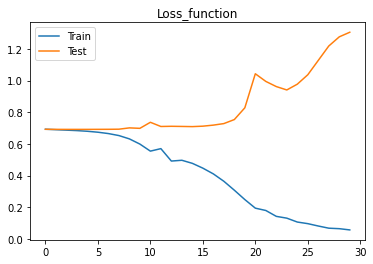

In [ ]:
plt.plot(lstm_history_2.history["loss"])
plt.plot(lstm_history_2.history["val_loss"])
plt.title("Loss_function")
plt.legend(["Train", "Test"])
plt.show()

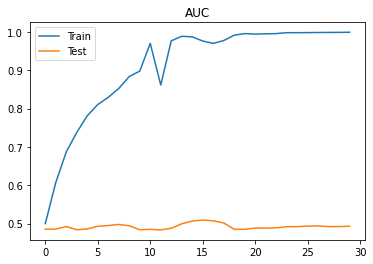

In [ ]:
plt.plot(lstm_history_2.history["auc"])
plt.plot(lstm_history_2.history["val_auc"])
plt.title("AUC")
plt.legend(["Train", "Test"])
plt.show()

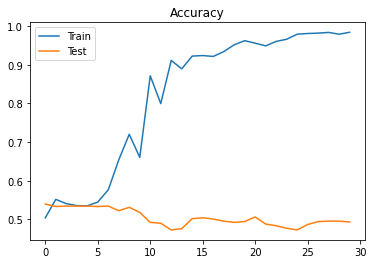

In [ ]:
plt.plot(lstm_history_2.history["accuracy"])
plt.plot(lstm_history_2.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
report_2=classification_report(sentiments_2['Actual'],predictions_lstm_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.48      0.36      0.41       497
           1       0.51      0.63      0.57       529

    accuracy                           0.50      1026
   macro avg       0.50      0.50      0.49      1026
weighted avg       0.50      0.50      0.49      1026



# Section 3 | TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")


In [ ]:
X = vectorizer.fit_transform(new_df["Total News"].dropna())



In [ ]:
words = vectorizer.get_feature_names()

In [ ]:
print(words)

['aa', 'aaa', 'aaaw', 'aab', 'aabo', 'aadmi', 'aafia', 'aah', 'aali', 'aam', 'aamer', 'aamir', 'aap', 'aaron', 'aaronovitch', 'aarp', 'ab', 'ababa', 'aback', 'abadan', 'abadi', 'abajo', 'aban', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abate', 'abattoir', 'abattoirs', 'abay', 'abaya', 'abba', 'abbado', 'abbas', 'abbasi', 'abbe', 'abbey', 'abbot', 'abbott', 'abbottabad', 'abbotts', 'abbreviation', 'abby', 'abc', 'abcs', 'abdel', 'abdelbaset', 'abdelrahman', 'abdeslam', 'abdicate', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdishakur', 'abdolfattah', 'abdolmalek', 'abdomen', 'abdomens', 'abdominal', 'abduct', 'abducted', 'abducting', 'abduction', 'abductions', 'abductor', 'abductors', 'abdul', 'abdulateef', 'abdulaziz', 'abdullah', 'abdullahi', 'abe', 'abed', 'abel', 'abera', 'abercrombie', 'aberdeen', 'aberdeenshire', 'abergavenny', 'abergil', 'aberrant', 'aberration', 'abf', 'abhinav', 'abhor', 'abhorrent', 'abi', 'abia', 'abid', 'abide', 'abidine',

In [ ]:
words_df = pd.DataFrame(
    list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Word_Count"]
)

In [ ]:
words_df

,Word,Word_Count
0,aa,0.672207
1,aaa,0.649547
2,aaaw,0.114585
3,aab,0.093420
4,aabo,0.091528
...,...,...
45699,zweig,0.130688
45700,zweimal,0.086769
45701,zygi,0.087054
45702,zygotic,0.155700


In [ ]:
corpus = [i for i in headlines]
X_corpus = vectorizer.fit_transform(corpus)

In [ ]:
words_corpus = vectorizer.get_feature_names()
print(words_corpus)

['aa', 'aaa', 'aaaw', 'aab', 'aabo', 'aadmi', 'aafia', 'aah', 'aali', 'aam', 'aamer', 'aamir', 'aap', 'aaron', 'aaronovitch', 'aarp', 'ab', 'ababa', 'aback', 'abadan', 'abadi', 'abajo', 'aban', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abate', 'abattoir', 'abattoirs', 'abay', 'abaya', 'abba', 'abbado', 'abbas', 'abbasi', 'abbe', 'abbey', 'abbot', 'abbott', 'abbottabad', 'abbotts', 'abbreviation', 'abby', 'abc', 'abcs', 'abdel', 'abdelbaset', 'abdelrahman', 'abdeslam', 'abdicate', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdishakur', 'abdolfattah', 'abdolmalek', 'abdomen', 'abdomens', 'abdominal', 'abduct', 'abducted', 'abducting', 'abduction', 'abductions', 'abductor', 'abductors', 'abdul', 'abdulateef', 'abdulaziz', 'abdullah', 'abdullahi', 'abe', 'abed', 'abel', 'abera', 'abercrombie', 'aberdeen', 'aberdeenshire', 'abergavenny', 'abergil', 'aberrant', 'aberration', 'abf', 'abhinav', 'abhor', 'abhorrent', 'abi', 'abia', 'abid', 'abide', 'abidine',

In [ ]:

  
#words_corpus = vectorizer.get_feature_names()
print(words_corpus)

['aa', 'aaa', 'aaaw', 'aab', 'aabo', 'aadmi', 'aafia', 'aah', 'aali', 'aam', 'aamer', 'aamir', 'aap', 'aaron', 'aaronovitch', 'aarp', 'ab', 'ababa', 'aback', 'abadan', 'abadi', 'abajo', 'aban', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abate', 'abattoir', 'abattoirs', 'abay', 'abaya', 'abba', 'abbado', 'abbas', 'abbasi', 'abbe', 'abbey', 'abbot', 'abbott', 'abbottabad', 'abbotts', 'abbreviation', 'abby', 'abc', 'abcs', 'abdel', 'abdelbaset', 'abdelrahman', 'abdeslam', 'abdicate', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdishakur', 'abdolfattah', 'abdolmalek', 'abdomen', 'abdomens', 'abdominal', 'abduct', 'abducted', 'abducting', 'abduction', 'abductions', 'abductor', 'abductors', 'abdul', 'abdulateef', 'abdulaziz', 'abdullah', 'abdullahi', 'abe', 'abed', 'abel', 'abera', 'abercrombie', 'aberdeen', 'aberdeenshire', 'abergavenny', 'abergil', 'aberrant', 'aberration', 'abf', 'abhinav', 'abhor', 'abhorrent', 'abi', 'abia', 'abid', 'abide', 'abidine',

In [ ]:
words_corpus_df = pd.DataFrame(
    list(zip(words_corpus, np.ravel(X_corpus.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_corpus_df = words_corpus_df.sort_values(by=["TF-IDF"], ascending=False)

In [ ]:
words_corpus_df = pd.DataFrame(
    list(zip(words_corpus, np.ravel(X_corpus.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_corpus_df = words_corpus_df.sort_values(by=["TF-IDF"], ascending=False)

In [ ]:
words_corpus_df.head(10)

,Word,TF-IDF
27472,new,0.019155
34228,review,0.018041
35623,says,0.016701
44998,world,0.016333
20706,israel,0.014802
30993,police,0.013803
16772,government,0.013609
7082,china,0.013541
44031,war,0.012751
15102,football,0.012599


In [ ]:
traindataset=countvector.fit_transform(words_corpus_df["Word"])

ValueError: ignored

In [ ]:
model_lstm_3 = Sequential()
dropout_fraction = 0.2
# Layer 1
model_lstm_3.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_lstm_3.add(Dropout(dropout_fraction))
# Layer 2
model_lstm_3.add(LSTM(units=50))
model_lstm_3.add(Dropout(dropout_fraction))
# Output layer
model_lstm_3.add(Dense(1, activation="sigmoid"))

In [ ]:
model_lstm_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy',"AUC"]
)

In [ ]:
model_lstm_3.summary()

In [ ]:
batch_size = 1000
lstm_history_3 = model_lstm_3.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.3
)